# Exercice réseaux de neurone

## Enonce

Le but de cette exercice est de prédire si un élève est admis ou non en fonction des notes qu'il a reçu dans plusieurs matières. La règle d'admission d'un élève est la suivante : **L'élève est admis si et seulement si la moyenne de ses notes est supérieure à 10**.

## Librairies

In [331]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE

## Data

In [332]:
#on génère un dataset, avec n features (i.e 2 matières), et m échantillons
n_features = 2
n_echantillons = 1000
seed = 42

X = np.ones(shape=(n_echantillons, n_features))
y = np.ones(shape=(n_echantillons,))
print(X.shape)
print(y.shape)

rng = np.random.default_rng(seed)

for i in range(n_echantillons):
    for j in range(n_features):
        noteEleve = round(rng.uniform(0,20),1)
        X[i][j] = noteEleve

    testEleveAdmi = np.average(X[i,:])
    #print(X[i,:], testEleveAdmi)
    y[i] = testEleveAdmi >= 10

print(X)
print(y)

(1000, 2)
(1000,)
[[15.5  8.8]
 [17.2 13.9]
 [ 1.9 19.5]
 ...
 [ 9.5 15.1]
 [ 5.7  6.7]
 [16.9 10.4]]
[1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 0. 

## Representation graphique

C:\Users\AntoninDurand\AppData\Local\Temp\ipykernel_5860\3350270403.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y==0][:,0], X[y==0][:,1], c="C"+str(0), label="Admission : " + str(0), cmap='winter')
C:\Users\AntoninDurand\AppData\Local\Temp\ipykernel_5860\3350270403.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[y==1][:,0], X[y==1][:,1], c="C"+str(1), label="Admission : " + str(1), cmap='winter')


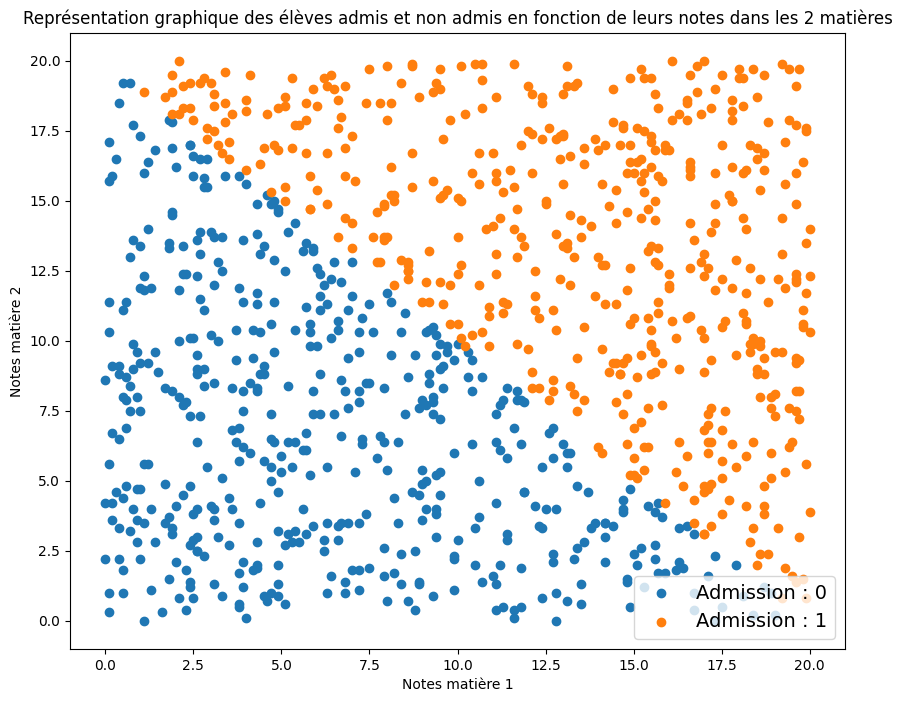

In [333]:
#on représente graphiquement les données, i.e les notes des élèves
plt.figure(figsize=(10,8))

plt.scatter(X[y==0][:,0], X[y==0][:,1], c="C"+str(0), label="Admission : " + str(0), cmap='winter')
plt.scatter(X[y==1][:,0], X[y==1][:,1], c="C"+str(1), label="Admission : " + str(1), cmap='winter')

plt.title("Représentation graphique des élèves admis et non admis en fonction de leurs notes dans les 2 matières")
plt.legend(fontsize=14)
plt.xlabel("Notes matière 1")
plt.ylabel("Notes matière 2")


plt.show()

## Classe réseau de neurones

In [334]:
class ReseauxNeurones():
    def _init__(self, W, b):
        self.W = W
        self.b = b
        self.learning_rate = None
        self.X_train = None
        self.y_train = None
        self.cout = None
    
    def __model(self, X):
        Z=X.dot(self.W) + self.b
        A=1/(1+np.exp(-Z))
        return A
    
    def __initialisation(self, X, y, learning_rate):
        self.X_train = X
        self.y_train = y
        self.W=np.random.randn(self.X_train.shape[1],1)
        self.b=np.random.randn(1)
        self.learning_rate = learning_rate
        self.cout = []
    
    def __logLoss(self, A):
        return 1/len(self.y_train)*np.sum(-self.y_train*np.log(A)-(1-self.y_train)*np.log(1-A))
    
    def __gradient(self, A):
        dW=1/len(self.y_train)*np.dot(self.X_train.T,A-self.y_train)
        db=1/len(self.y_train)*sum(A-self.y_train)
        return (dW,db)
    
    def __update(self,dW,db):
        self.W=self.W-self.learning_rate*dW
        self.b=self.b-self.learning_rate*db

    def fit(self, X,y, learning_rate=0.01, n_iter=10000):
        #initialisation
        self.__initialisation(X, y, learning_rate)
        
        
        for i in range(n_iter):
            A=self.__model(X,)
            self.cout.append(self.__logLoss(A))
            dW,db=self.__gradient(A)
            self.__update(dW,db)
            
        y_pred=self.predict(X)
        
        return y_pred
        
    def predict(self, X_predict):
        A=self.__model(X_predict)
        #print(A)
        return A>=0.5

## Entraînement du modèle

0.94


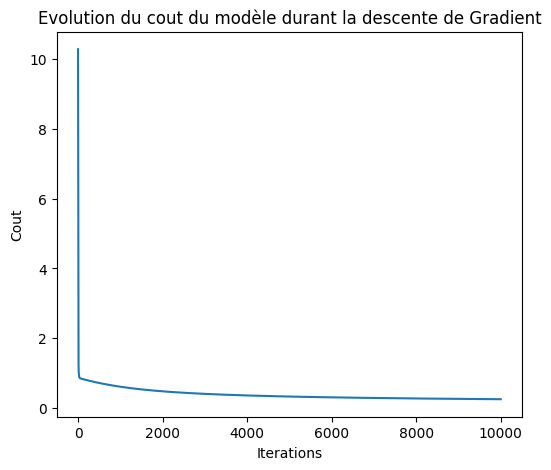

In [335]:
#on reshape la mtatrice y
y = y.reshape(y.shape[0], 1)
#print(y.shape)

#on crée un objet réseaux neurones, et on passe le dataset précédent pour l'entrainer et pour obtenir les bon paramètres w et b
rn = ReseauxNeurones()
y_pred = rn.fit(X, y)

#on affiche les performances de notre modèle
print(accuracy_score(y, y_pred))

#on représente graphiquement l'évolution du cout du modele
plt.figure(figsize=(6,5))

plt.plot(rn.cout)

plt.title("Evolution du cout du modèle durant la descente de Gradient")
plt.xlabel("Iterations")
plt.ylabel("Cout")

plt.show()

## Test du modèle avec 1 nouvel élève

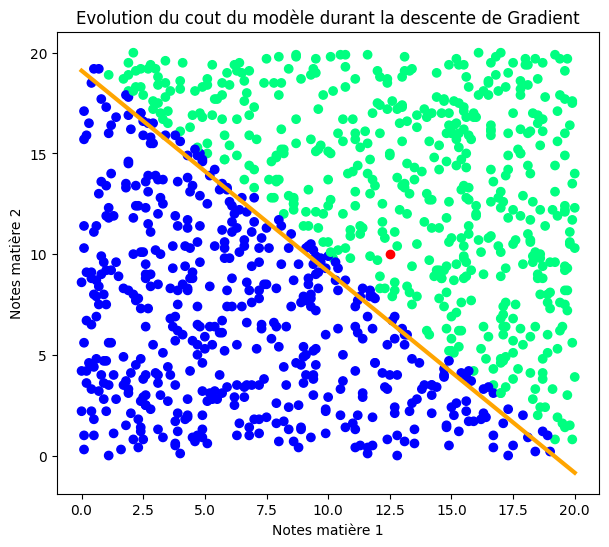

[ True]


In [336]:
#on créé un nouvel élève avec 2 notes
nouvelEleve=np.array([12.5,10])

x0=np.linspace(0,20,100)
x1=(-rn.W[0]*x0-rn.b)/rn.W[1]

plt.figure(figsize=(7,6))

plt.scatter(X[:,0], X[:,1], c=y, cmap='winter')
plt.plot(x0,x1,c='orange',lw=3)
plt.scatter(nouvelEleve[0], nouvelEleve[1],c='r')

plt.title("Evolution du cout du modèle durant la descente de Gradient")
plt.xlabel("Notes matière 1")
plt.ylabel("Notes matière 2")

plt.show()

#on prédit la classe de l'élèe, i.e s'il est admis ou non
print(rn.predict(nouvelEleve))

## Data avec 5 notes

In [337]:
#on crée maintenant un dataset avec des élèves possédant 5 notes dans 5 matières différentes
n_features = 5
X1 = np.ones(shape=(n_echantillons, n_features))
y1 = np.ones(shape=(n_echantillons,))
print(X1.shape)
print(y1.shape)

rng = np.random.default_rng(seed)

for i in range(n_echantillons):
    for j in range(n_features):
        noteEleve = round(rng.uniform(0,20),1)
        X1[i][j] = noteEleve

    testEleveAdmi = np.average(X1[i,:])
    #print(X[i,:], testEleveAdmi)
    y1[i] = testEleveAdmi >= 8

print(X1)
print(y1)

(1000, 5)
(1000,)
[[15.5  8.8 17.2 13.9  1.9]
 [19.5 15.2 15.7  2.6  9. ]
 [ 7.4 18.5 12.9 16.5  8.9]
 ...
 [ 6.7 12.7  3.8 18.4  2.1]
 [ 0.1 17.1 14.1  7.1 11.9]
 [ 4.5  3.4  9.4  7.1 12.3]]
[1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1

C:\Users\AntoninDurand\AppData\Local\Temp\ipykernel_5860\1521882582.py:24: RuntimeWarning: divide by zero encountered in log
  return 1/len(self.y_train)*np.sum(-self.y_train*np.log(A)-(1-self.y_train)*np.log(1-A))
C:\Users\AntoninDurand\AppData\Local\Temp\ipykernel_5860\1521882582.py:24: RuntimeWarning: invalid value encountered in multiply
  return 1/len(self.y_train)*np.sum(-self.y_train*np.log(A)-(1-self.y_train)*np.log(1-A))


0.887


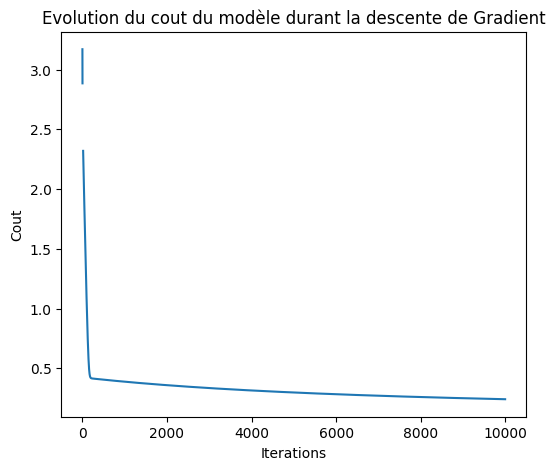

In [338]:
#on reshape la mtatrice y
y1 = y1.reshape(y1.shape[0], 1)
#print(y.shape)

#on crée un objet réseaux neurones, et on passe le dataset précédent pour l'entrainer et pour obtenir les bon paramètres w et b
rn1 = ReseauxNeurones()
y_pred1 = rn1.fit(X1, y1, n_iter=10000)

#on affiche les performances de notre modèle
print(accuracy_score(y1, y_pred1))

#on représente graphiquement l'évolution du cout du modele
plt.figure(figsize=(6,5))

plt.plot(rn1.cout)

plt.title("Evolution du cout du modèle durant la descente de Gradient")
plt.xlabel("Iterations")
plt.ylabel("Cout")

plt.show()

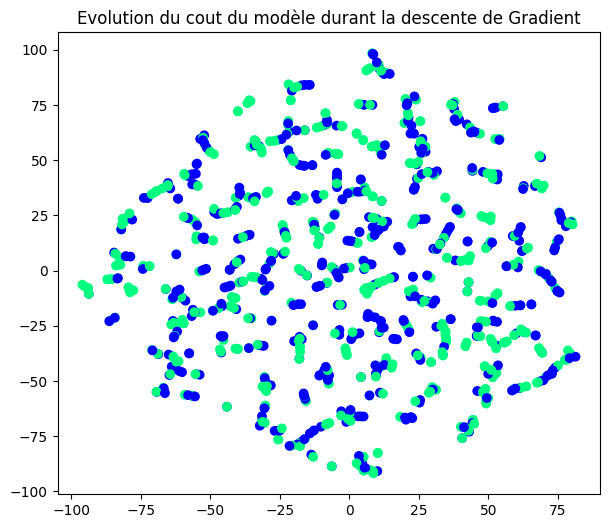

[ 4.4 13.3 15.3  3.3  0.9]
7.4399999999999995
[ True]


In [339]:
#on ne peut pas afficher le dataset graphiquement car il est en 5 dimensions, on utilise donc l'algo TSNE qui effectue une réduction de dimension pour visualiser le dataset
tsne_rn = TSNE(n_components=2, 
            learning_rate='auto', 
            init='random', 
            perplexity=3)

x_tsne_rn = tsne_rn.fit_transform(X1)

plt.figure(figsize=(7,6))

plt.scatter(x_tsne_rn[:,0], x_tsne_rn[:,1], c=y, cmap='winter')

plt.title("Evolution du cout du modèle durant la descente de Gradient")
plt.show()

#on prédit la classe de l'élève, i.e s'il est admis ou non
nouvelEleveTsne = np.array([round(rng.uniform(0,20),1) for i in range(5)])
print(nouvelEleveTsne)
print(np.mean(nouvelEleveTsne))
print(rn1.predict(nouvelEleveTsne))